# Shane Rodricks and Ivan Orlovic

# Family Guy - An analysis on Family Guy Jokes using Natural Language Processing


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
fm = pd.read_csv('Family_Guy_Final_NRC_AFINN_BING.csv')

In [ ]:
fm.head()

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment
0,1,1,00:00:07,"Mom, Dad, I found cigarettes in Greg's jacket.","joy,positive,trust",Neutral,0,Neutral
1,1,1,00:00:10,"Greg, were you smoking cigarettes?",Neutral,Neutral,0,Neutral
2,1,1,00:00:10,"No, Dad.",Neutral,Negative,-2,Neutral
3,1,1,00:00:12,He's lying. There's no doubt about that.,"anger,disgust,fear,negative,sadness,trust",Negative,-2,Negative
4,1,1,00:00:14,"Greg, I'm afraid your punishment will be four ...","anger,disgust,fear,negative",Negative,-2,Negative


In [ ]:
fm.tail()

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment
155237,19,5,00:20:42,"Oh. That's fine, Brian.",Neutral,Positive,2,Positive
155238,19,5,00:20:46,"Hey, what do you say you and me go for a walk ...",Neutral,Neutral,0,Neutral
155239,19,5,00:20:50,You know what? This is kind of nice.,"joy,positive,trust",Positive,5,Positive
155240,19,5,00:20:52,I thought you were gonna do some kind of Godfa...,"anger,anticipation,disgust,fear,joy,negative,p...",Neutral,0,Negative
155241,19,5,00:20:55,"Oh, Brian, I don't watch Mafia movies.","anticipation,fear,negative",Neutral,0,Neutral


In [ ]:
# Convert all dialogue entries to strings to avoid type errors
fm['Dialogue'] = fm['Dialogue'].astype(str)

# Group by season and episode, combining dialogues into a single string
fm_combined_dialogue_only = fm.groupby(['Season', 'Episode'])['Dialogue'].apply(lambda x: ' '.join(x)).reset_index()

# Preview the resulting dataset
fm_combined_dialogue_only.head()



,Season,Episode,Dialogue
0,1,1,"Mom, Dad, I found cigarettes in Greg's jacket...."
1,1,2,Look at Stewie. Isn't he adorable playing with...
2,1,3,It seems today that all you see is violence in...
3,1,4,When life is getting to you put some fresh in ...
4,1,5,Machiavelli! You've told me nothing I don't al...


In [ ]:
fm_combined_dialogue_only.head()

,Season,Episode,Dialogue
0,1,1,"Mom, Dad, I found cigarettes in Greg's jacket...."
1,1,2,Look at Stewie. Isn't he adorable playing with...
2,1,3,It seems today that all you see is violence in...
3,1,4,When life is getting to you put some fresh in ...
4,1,5,Machiavelli! You've told me nothing I don't al...


In [ ]:
fm_combined_dialogue_only.tail()

,Season,Episode,Dialogue
346,19,1,Is violence in movies and sex on TV But where ...
347,19,2,Is violence in movies and sex on TV But where ...
348,19,3,Is violence in movies and sex on TV But where ...
349,19,4,Is violence in movies and sex on TV But where ...
350,19,5,Is violence in movies and sex on TV But where ...


# Task 1: Can we determine if an episode is funny or not?


In [ ]:
import re

# Defining positive and negative words to evaluate "funny" content
positive_keywords = ['laugh', 'funny', 'humor', 'joke', 'hilarious', 'comedy']
negative_keywords = ['sad', 'boring', 'dull', 'serious', 'depressing']

# Function to evaluate sentiment score
def evaluate_sentiment(dialogue):
    # Count positive and negative keywords
    positive_count = sum(1 for word in positive_keywords if re.search(word, dialogue, re.IGNORECASE))
    negative_count = sum(1 for word in negative_keywords if re.search(word, dialogue, re.IGNORECASE))

    # Net score: Positive - Negative
    return positive_count - negative_count

# Adding a sentiment score column to the combined dataset
fm_combined_dialogue_only['Sentiment_Score'] = fm_combined_dialogue_only['Dialogue'].apply(evaluate_sentiment)

# Determine if each episode is considered "funny"
fm_combined_dialogue_only['Is_Funny'] = fm_combined_dialogue_only['Sentiment_Score'].apply(lambda x: 'Funny' if x > 0 else 'Not Funny')

# Preview the resulting dataset with the sentiment score and classification
fm_combined_dialogue_only[['Season', 'Episode', 'Sentiment_Score', 'Is_Funny']].head(100)


,Season,Episode,Sentiment_Score,Is_Funny
0,1,1,2,Funny
1,1,2,0,Not Funny
2,1,3,0,Not Funny
3,1,4,5,Funny
4,1,5,2,Funny
...,...,...,...,...
95,6,1,1,Funny
96,6,2,2,Funny
97,6,3,2,Funny
98,6,4,0,Not Funny


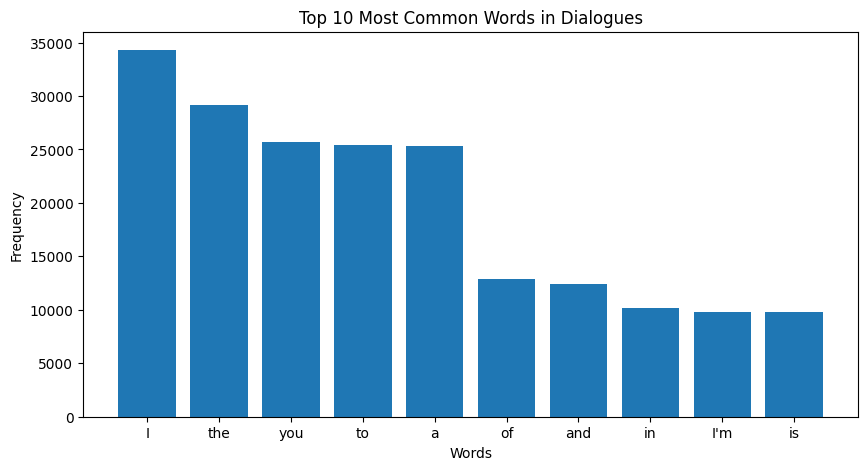

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all dialogues into one large string
all_dialogues = ' '.join(fm_combined_dialogue_only['Dialogue'].dropna())

# Tokenize and count word frequencies
words = all_dialogues.split()
word_counts = Counter(words)

# Most common words visualization
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Dialogues')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import string
from nltk.corpus import stopwords
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Set of stop words
stop_words = set(stopwords.words('english'))

# Tokenizing the dialogues and lowercasing
tokens = word_tokenize(' '.join(fm_combined_dialogue_only['Dialogue'].dropna()).lower())

# Filter out punctuation and stop words
tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]

# Generate bigrams and trigrams
bigram_list = list(bigrams(tokens))
trigram_list = list(trigrams(tokens))

# Count frequencies of bigrams and trigrams
bigram_counts = Counter(bigram_list)
trigram_counts = Counter(trigram_list)

# Most common bigrams and trigrams
common_bigrams = bigram_counts.most_common(10)
common_trigrams = trigram_counts.most_common(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


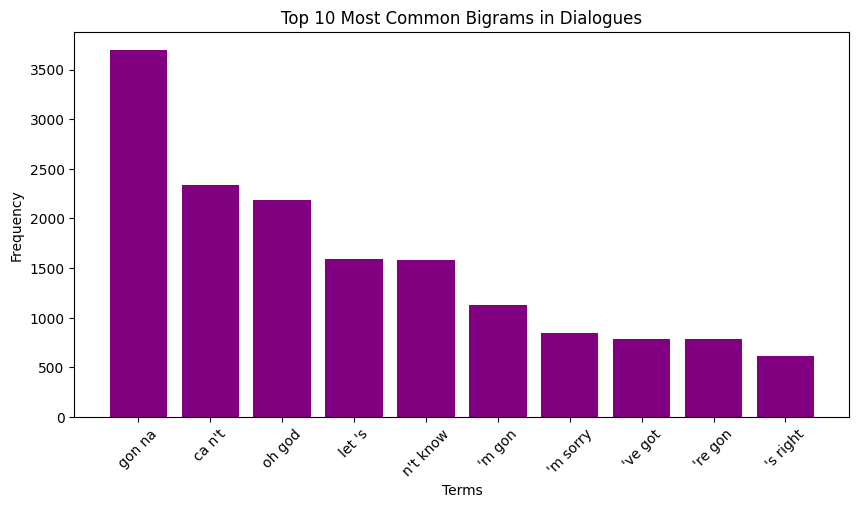

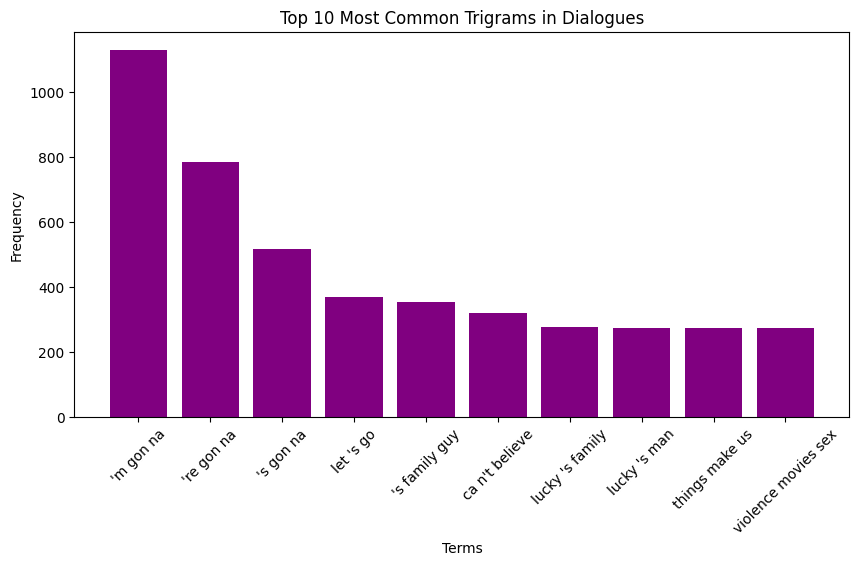

In [ ]:
def plot_ngrams(ngram_counts, title):
    terms, freqs = zip(*ngram_counts)
    terms = [' '.join(term) for term in terms]
    plt.figure(figsize=(10, 5))
    plt.bar(terms, freqs, color='purple')
    plt.title(title)
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plotting the most common bigrams and trigrams
plot_ngrams(common_bigrams, 'Top 10 Most Common Bigrams in Dialogues')
plot_ngrams(common_trigrams, 'Top 10 Most Common Trigrams in Dialogues')


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK's VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# get sentiment score using VADER
def evaluate_sentiment_vader(dialogue):
    score = sia.polarity_scores(dialogue)
    return score['compound']  # Return the compound score

fm_combined_dialogue_only['VADER_Score'] = fm_combined_dialogue_only['Dialogue'].apply(evaluate_sentiment_vader)


In [ ]:
# group by season and episode
# calculate the mean sentiment score
episode_sentiment = fm_combined_dialogue_only.groupby(['Season', 'Episode']).agg({
    'VADER_Score': 'mean'
}).reset_index()


episode_sentiment.rename(columns={'VADER_Score': 'Average_Sentiment_Score'}, inplace=True)


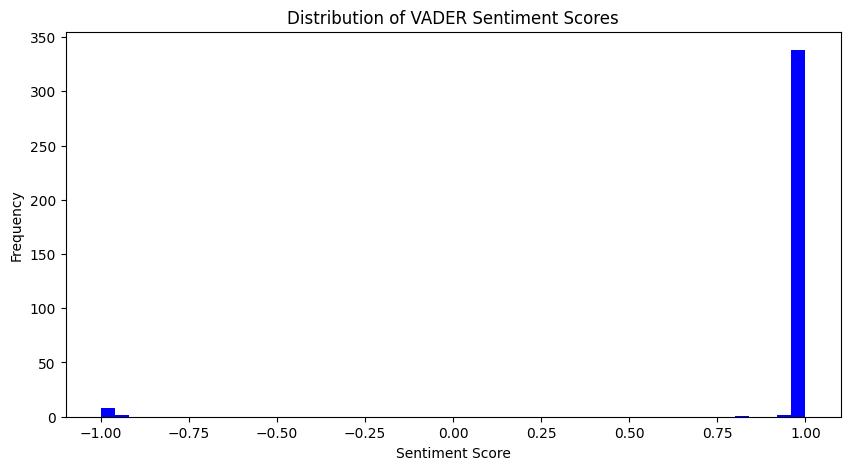

In [ ]:
# Histogram of VADER sentiment scores
plt.figure(figsize=(10, 5))
plt.hist(fm_combined_dialogue_only['VADER_Score'], bins=50, color='blue')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Sort episodes by Average_Sentiment_Score in descending order
episode_sentiment = episode_sentiment.sort_values(by='Average_Sentiment_Score', ascending=False)

# Add a rank column
episode_sentiment['Humor_Rank'] = episode_sentiment['Average_Sentiment_Score'].rank(method='dense', ascending=False)


In [ ]:
# Merge the ranking back to the main DataFrame if needed
fm_combined_dialogue_only = pd.merge(fm_combined_dialogue_only, episode_sentiment, on=['Season', 'Episode'])

# Print the top 10 funniest episodes
print(episode_sentiment.head(10))


     Season  Episode  Average_Sentiment_Score  Humor_Rank
132       8       10                      1.0         1.0
140       8       18                      1.0         1.0
46        3       19                      1.0         1.0
40        3       13                      1.0         1.0
250      14        5                      1.0         1.0
35        3        8                      1.0         1.0
120       7       14                      1.0         1.0
32        3        5                      1.0         1.0
103       6        9                      1.0         1.0
29        3        2                      1.0         1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

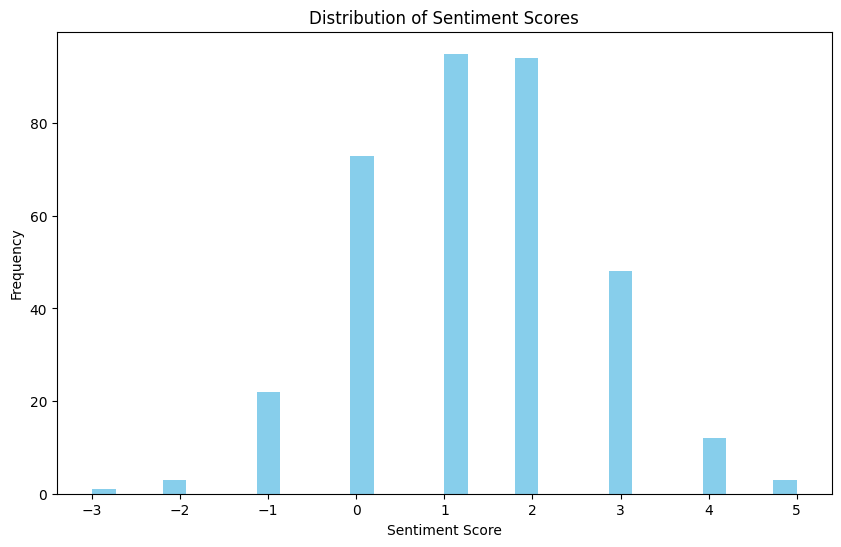

In [ ]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(fm_combined_dialogue_only['Sentiment_Score'], bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

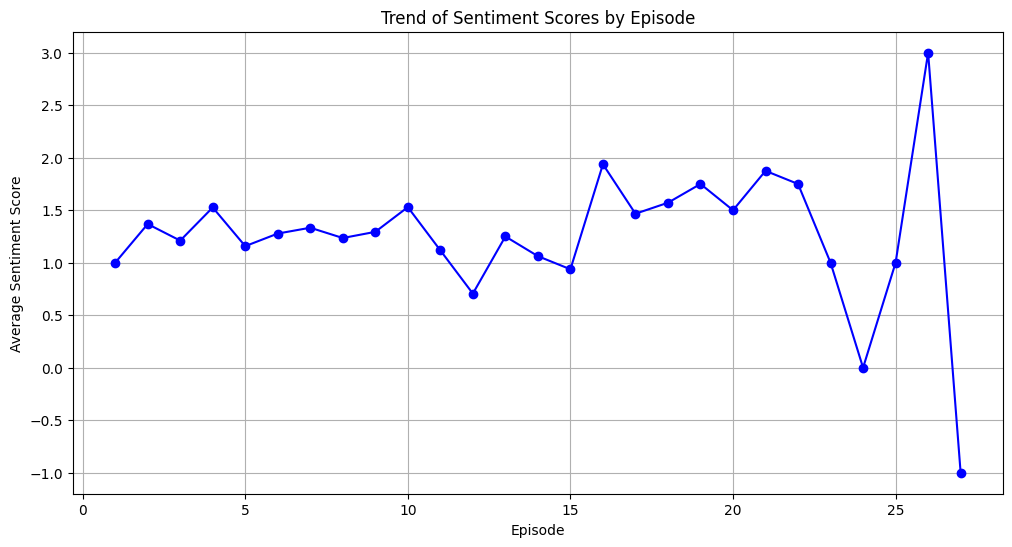

In [ ]:
# Trend of sentiment scores over episodes
plt.figure(figsize=(12, 6))
plt.plot(fm_combined_dialogue_only.groupby('Episode')['Sentiment_Score'].mean(), marker='o', linestyle='-', color='blue')
plt.title('Trend of Sentiment Scores by Episode')
plt.xlabel('Episode')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


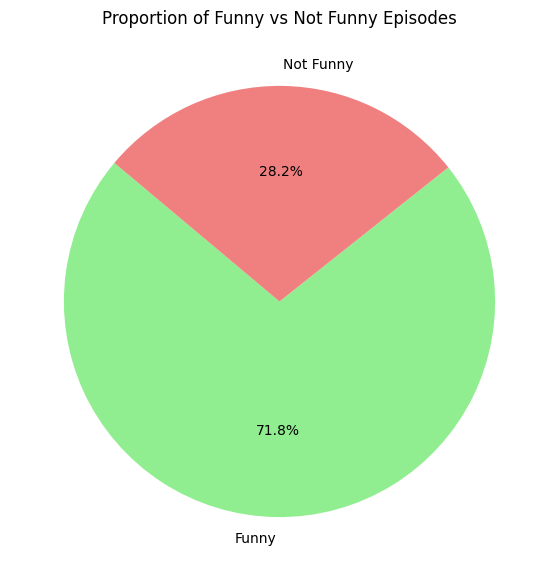

In [ ]:
# Comparison by 'Is_Funny' classification
funny_counts = fm_combined_dialogue_only['Is_Funny'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(funny_counts, labels=funny_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Funny vs Not Funny Episodes')
plt.show()

# Task 3: Can we analyze joke length? Can we determine if a sentence is considered a “joke” just based on the length?


In [ ]:
# Ensure all dialogue entries are strings
fm['Dialogue'] = fm['Dialogue'].astype(str)

# Recalculate the word count
fm['Word_Count'] = fm['Dialogue'].apply(lambda x: len(x.split()))


In [ ]:
# If you prefer to fill NaN values with a placeholder
fm['Dialogue'].fillna('No dialogue', inplace=True)

# Or, if you prefer to exclude NaN values from analysis that depends on word count
fm['Word_Count'] = fm['Dialogue'].dropna().apply(lambda x: len(x.split()))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Dialogue' entries are now all properly formatted as strings
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(fm['Dialogue'])


In [ ]:
# Print sample data to ensure everything is formatted correctly
print(fm[['Dialogue', 'Word_Count']].head())


                                            Dialogue  Word_Count
0     Mom, Dad, I found cigarettes in Greg's jacket.           8
1                 Greg, were you smoking cigarettes?           5
2                                           No, Dad.           2
3           He's lying. There's no doubt about that.           7
4  Greg, I'm afraid your punishment will be four ...          12


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
fm = pd.read_csv('Family_Guy_Final_NRC_AFINN_BING.csv')  # Update the file path accordingly

# Basic text statistics
# Make sure to convert every entry to a string within the apply function and handle null values
fm['Word_Count'] = fm['Dialogue'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Drop rows where 'Dialogue' is NaN
fm = fm.dropna(subset=['Dialogue'])


# TF-IDF Vectorization to analyze the importance of words across dialogues
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(fm['Dialogue'])


Step 2: Sentiment Analysis
Utilize sentiment analysis to see if there's any correlation between sentiments expressed and the humorous nature of the dialogues.

In [ ]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('punkt')

# Example text from your dataset
example_text = fm_combined_dialogue_only['Dialogue'][0]  # Adjust the index as needed for a specific example

# Tokenizing the text
tokens = word_tokenize(example_text)

# Applying POS tagging
pos_tags = pos_tag(tokens)

# Applying NER
ner_tags = ne_chunk(pos_tags)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Print POS tags
print("Part-of-Speech Tags:")
print(pos_tags)

# Print NER tags
print("\nNamed Entity Recognition Tags:")
print(ner_tags)


Part-of-Speech Tags:
[('Mom', 'NN'), (',', ','), ('Dad', 'NNP'), (',', ','), ('I', 'PRP'), ('found', 'VBD'), ('cigarettes', 'NNS'), ('in', 'IN'), ('Greg', 'NNP'), ("'s", 'POS'), ('jacket', 'NN'), ('.', '.'), ('Greg', 'NNP'), (',', ','), ('were', 'VBD'), ('you', 'PRP'), ('smoking', 'VBG'), ('cigarettes', 'NNS'), ('?', '.'), ('No', 'UH'), (',', ','), ('Dad', 'NNP'), ('.', '.'), ('He', 'PRP'), ("'s", 'VBZ'), ('lying', 'VBG'), ('.', '.'), ('There', 'EX'), ("'s", 'VBZ'), ('no', 'DT'), ('doubt', 'NN'), ('about', 'IN'), ('that', 'DT'), ('.', '.'), ('Greg', 'NNP'), (',', ','), ('I', 'PRP'), ("'m", 'VBP'), ('afraid', 'JJ'), ('your', 'PRP$'), ('punishment', 'NN'), ('will', 'MD'), ('be', 'VB'), ('four', 'CD'), ('hours', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('snakepit', 'NN'), ('.', '.'), ('That', 'DT'), ("'ll", 'MD'), ('give', 'VB'), ('you', 'PRP'), ('time', 'NN'), ('to', 'TO'), ('think', 'VB'), ('about', 'IN'), ('what', 'WP'), ('you', 'PRP'), ('did', 'VBD'), ('.', '.'), ('Man', 'NN'), ('!', '.')

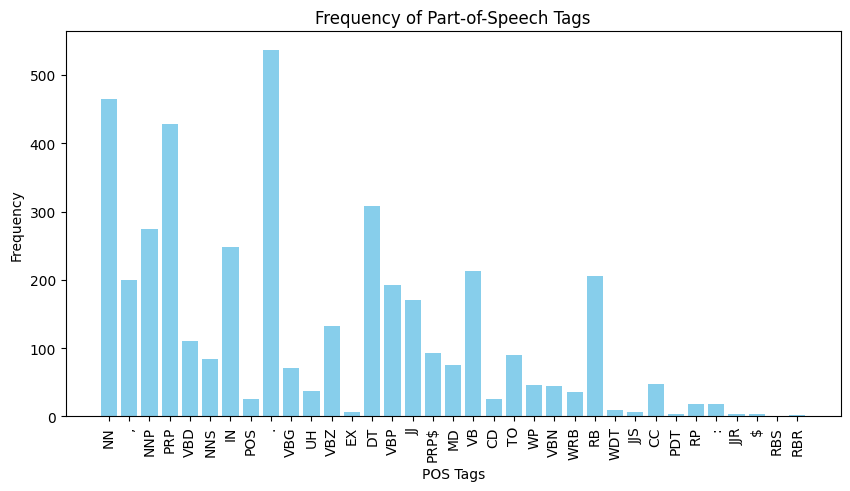

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count POS tags
pos_counts = Counter(tag for word, tag in pos_tags)

# Data for plotting
labels, values = zip(*pos_counts.items())

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Frequency of Part-of-Speech Tags')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()


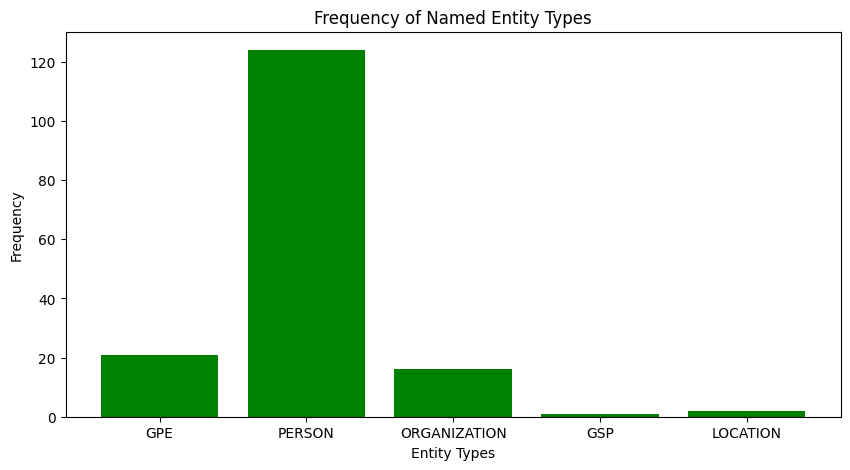

In [ ]:
# Extract named entities
named_entities = []
for chunk in ner_tags:
    if hasattr(chunk, 'label'):
        named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Count named entity types
entity_counts = Counter(label for label, entity in named_entities)

# Data for plotting
labels, values = zip(*entity_counts.items())

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='green')
plt.title('Frequency of Named Entity Types')
plt.xlabel('Entity Types')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from textblob import TextBlob

# Function to get polarity and subjectivity of dialogues
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Applying sentiment analysis
fm['Polarity'], fm['Subjectivity'] = zip(*fm['Dialogue'].apply(get_sentiment))


Step 3: Part-of-Speech Tagging
Analyzing the structure of sentences can help identify patterns typical to jokes, such as the presence of puns or unexpected word combinations.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(text):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tags

fm['POS_Tags'] = fm['Dialogue'].apply(get_pos_tags)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Step 4: Named Entity Recognition (NER)
Jokes might often involve named entities in certain contexts; recognizing these can be useful.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

def get_named_entities(text):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    entities = nltk.chunk.ne_chunk(tags)
    return [entity for entity in entities if isinstance(entity, nltk.tree.Tree)]

fm['Named_Entities'] = fm['Dialogue'].apply(get_named_entities)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Step 5: Clustering Analysis
Group dialogues into clusters to identify any clusters that might be more likely to contain jokes.

In [ ]:
from sklearn.cluster import KMeans

# Using the TF-IDF matrix from earlier for clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(tfidf_matrix)
fm['Cluster'] = kmeans.labels_


In [ ]:
# Check unique cluster numbers
unique_clusters = fm['Cluster'].unique()
print("Available clusters:", unique_clusters)
# Define the specific cluster number you want to examine



Available clusters: [1 4 2 0 3]


Step 6: Analyze Clusters for Humor Content
Review clusters manually to see if any are particularly humorous, or analyze them based on the features extracted (like high polarity, unusual POS tags).

In [ ]:
specific_cluster_number = 4
# Filter the DataFrame to include only dialogues from the selected cluster
humorous_cluster = fm[fm['Cluster'] == specific_cluster_number]

# Optionally, print out some dialogues to manually inspect them
print("Examining dialogues in cluster", specific_cluster_number)
print(humorous_cluster['Dialogue'].head(25))  # Print the first few dialogues


Examining dialogues in cluster 4
13                          You folks want some pancakes?
145      Look, I don't want your mom to worry, all right?
168     Peter, I know it's a dangerous precedent but y...
237     Peter, you might want to call the Welfare Comm...
337                          You just want your toy back.
354     All right. Now I want you boys to scream real ...
438     You may want to find a better teacher than Peter.
449     You always want to be aware of other cars on t...
458     I didn't want to overload her on her first tim...
680     Peter, I'm thrilled that you want to spend so ...
695     There's only one show I want to see. It's call...
700     No, I don't want to miss the all-you-can-eat s...
827     My God. Your hair is so beautiful. I just want...
829                              You want to go throw up?
925     I'll give you whatever you want! Money! Women!...
957     It sounds like you don't want to go home. Are ...
966     If you pull a party out of your

In [ ]:
# creating a data frame with the humorous dialogue
humorous_dialogue_df = pd.DataFrame(humorous_cluster)

In [ ]:
# Examining a cluster
humorous_cluster = fm[fm['Cluster'] == specific_cluster_number]
print(humorous_cluster)


        Season  Episode Time_Stamp  \
13           1        1    0:00:38   
145          1        1    0:07:50   
168          1        1    0:09:03   
237          1        1    0:12:33   
337          1        1    0:18:01   
...        ...      ...        ...   
154879      19        5    0:02:58   
154922      19        5    0:05:11   
155113      19        5    0:15:02   
155148      19        5    0:16:48   
155213      19        5    0:19:18   

                                                 Dialogue  \
13                          You folks want some pancakes?   
145      Look, I don't want your mom to worry, all right?   
168     Peter, I know it's a dangerous precedent but y...   
237     Peter, you might want to call the Welfare Comm...   
337                          You just want your toy back.   
...                                                   ...   
154879   The last thing we want to do is point fingers...   
154922             No, I'm not. I can do whatever I wan

In [ ]:

# Calculate average word count and sentiment in the cluster
average_word_count = humorous_cluster['Word_Count'].mean()
print("Average word count in cluster:", average_word_count)

# If sentiment scores were previously calculated
if 'Polarity' in humorous_cluster.columns:
    average_polarity = humorous_cluster['Polarity'].mean()
    print("Average sentiment polarity in cluster:", average_polarity)


Average word count in cluster: 10.44479943201988
Average sentiment polarity in cluster: 0.05435725560825401


#4 Can we determine if a joke is inappropriate or not?

In [ ]:
fm = pd.read_csv('Family_Guy_Final_NRC_AFINN_BING.csv')

In [ ]:
fm.head()

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment
0,1,1,0:00:07,"Mom, Dad, I found cigarettes in Greg's jacket.","joy,positive,trust",Neutral,0,Neutral
1,1,1,0:00:10,"Greg, were you smoking cigarettes?",Neutral,Neutral,0,Neutral
2,1,1,0:00:10,"No, Dad.",Neutral,Negative,-2,Neutral
3,1,1,0:00:12,He's lying. There's no doubt about that.,"anger,disgust,fear,negative,sadness,trust",Negative,-2,Negative
4,1,1,0:00:14,"Greg, I'm afraid your punishment will be four ...","anger,disgust,fear,negative",Negative,-2,Negative


In [ ]:
humorous_dialogue_df.head()

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment,Word_Count,Polarity,Subjectivity,POS_Tags,Named_Entities,Cluster
13,1,1,0:00:38,You folks want some pancakes?,Neutral,Positive,1,Neutral,5,0.000000,0.000000,"[(You, PRP), (folks, VBP), (want, VBP), (some,...",[],4
145,1,1,0:07:50,"Look, I don't want your mom to worry, all right?","anticipation,fear,negative,sadness",Negative,-2,Negative,10,0.285714,0.535714,"[(Look, NNP), (,, ,), (I, PRP), (do, VBP), (n'...","[[(Look, NNP)]]",4
168,1,1,0:09:03,"Peter, I know it's a dangerous precedent but y...","fear,negative,positive,trust",Positive,1,Negative,16,-0.600000,0.900000,"[(Peter, NNP), (,, ,), (I, PRP), (know, VBP), ...","[[(Peter, NNP)]]",4
237,1,1,0:12:33,"Peter, you might want to call the Welfare Comm...",trust,Positive,1,Neutral,9,0.000000,0.000000,"[(Peter, NNP), (,, ,), (you, PRP), (might, MD)...","[[(Peter, NNP)], [(Welfare, NNP), (Commission,...",4
337,1,1,0:18:01,You just want your toy back.,Neutral,Positive,1,Neutral,6,0.000000,0.000000,"[(You, PRP), (just, RB), (want, VB), (your, PR...",[],4


## Profanity Analysis

In [ ]:
#pip install better_profanity

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from better_profanity import profanity

profanity.load_censor_words()

def count_profanity_better_profanity(dialogues):
    profane_counts = []
    for dialogue in dialogues:
        words = word_tokenize(dialogue.lower())
        # Count profane words using better_profanity
        profane_count = sum([profanity.contains_profanity(word) for word in words])
        profane_counts.append(profane_count)
    return profane_counts

humorous_dialogue_df['Profanity_Count'] = count_profanity_better_profanity(humorous_dialogue_df['Dialogue'])
t
print(humorous_dialogue_df[['Dialogue', 'Profanity_Count']].head())


                                              Dialogue  Profanity_Count
13                       You folks want some pancakes?                0
145   Look, I don't want your mom to worry, all right?                0
168  Peter, I know it's a dangerous precedent but y...                0
237  Peter, you might want to call the Welfare Comm...                0
337                       You just want your toy back.                0


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist
from better_profanity import profanity

profanity.load_censor_words()

def extract_profanity_words(dialogues):
    profane_words_list = []
    for dialogue in dialogues:
        words = word_tokenize(dialogue.lower())
        # Filter
        profane_words = [word for word in words if profanity.contains_profanity(word)]
        profane_words_list.extend(profane_words)
    return profane_words_list

profane_words_used = extract_profanity_words(humorous_dialogue_df['Dialogue'])

fdist = FreqDist(profane_words_used)

for word, frequency in fdist.most_common():
    print(f"{word}: {frequency}")


kill: 25
sex: 23
hell: 21
god: 18
stupid: 10
ass: 9
damn: 8
bitch: 8
fat: 8
gay: 6
ugly: 5
crap: 5
naked: 4
penis: 4
hooker: 3
strip: 3
murder: 3
pee: 3
douche: 3
boobs: 3
dick: 3
masturbate: 3
weed: 2
horny: 2
piss: 2
fucking: 2
breasts: 2
suck: 2
pot: 2
boob: 2
slave: 2
nipples: 2
porn: 2
sweet-ass: 1
pissed: 1
pubic: 1
seamen: 1
poop: 1
rape: 1
tinkle: 1
homo: 1
po-bitch: 1
herpes: 1
whore: 1
screw: 1
prick: 1
virgin: 1
vagina: 1
bastard: 1
drunk: 1
sex-slave: 1
fart: 1
nude: 1
humping: 1
anus: 1
aryan: 1
douchebag: 1
stroke: 1


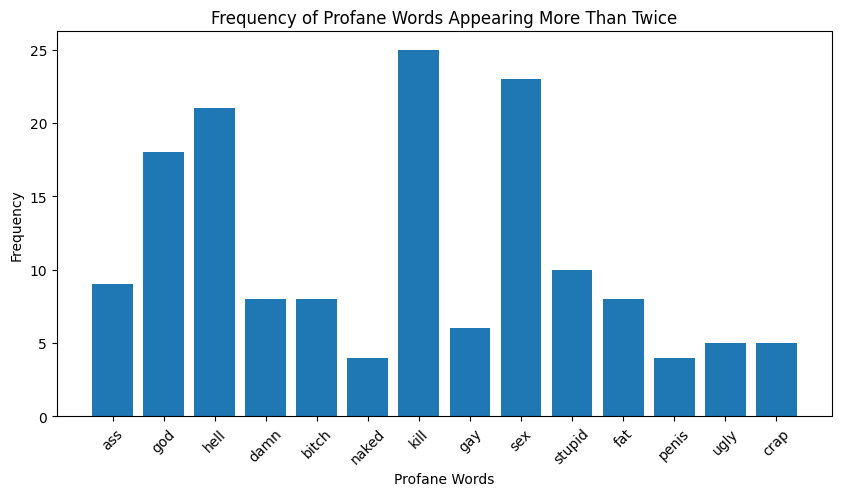

In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Filter out words that appear more than twice
words_more_than_twice = {word: count for word, count in fdist.items() if count > 3}

words = list(words_more_than_twice.keys())
frequencies = list(words_more_than_twice.values())

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Profane Words')
plt.ylabel('Frequency')
plt.title('Frequency of Profane Words Appearing More Than Twice')
plt.xticks(rotation=45)
plt.show()


## Looking beyond profanity

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from better_profanity import profanity
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
profanity.load_censor_words()

def analyze_dialogue(dialogues):
    results = []
    for dialogue in dialogues:
        analysis = {}
        # Sentiment
        sentiment_score = sia.polarity_scores(dialogue)
        analysis['negative'] = sentiment_score['neg']
        analysis['neutral'] = sentiment_score['neu']
        analysis['positive'] = sentiment_score['pos']
        analysis['compound'] = sentiment_score['compound']

        analysis['contains_profanity'] = profanity.contains_profanity(dialogue)

        results.append(analysis)
    return pd.DataFrame(results)

# Analyzing the humorous dialogues
analysis_results = analyze_dialogue(humorous_dialogue_df['Dialogue'])
humorous_dialogue_df = pd.concat([humorous_dialogue_df, analysis_results], axis=1)

print(humorous_dialogue_df.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     Season  Episode Time_Stamp  \
13      1.0      1.0    0:00:38   
145     1.0      1.0    0:07:50   
168     1.0      1.0    0:09:03   
237     1.0      1.0    0:12:33   
337     1.0      1.0    0:18:01   

                                              Dialogue  \
13                       You folks want some pancakes?   
145   Look, I don't want your mom to worry, all right?   
168  Peter, I know it's a dangerous precedent but y...   
237  Peter, you might want to call the Welfare Comm...   
337                       You just want your toy back.   

                          NRC_Sentiment AFINN_Sentiment  \
13                              Neutral        Positive   
145  anticipation,fear,negative,sadness        Negative   
168        fear,negative,positive,trust        Positive   
237                               trust        Positive   
337                             Neutral        Positive   

     AFINN_Sentiment_Score BING_Sentiment  Word_Count  Polarity  Subjectivity  \
13  

In [ ]:
import pandas as pd

def make_decision(row):
    # Define thresholds for decision
    negative_sentiment_threshold = 0.4
    profanity_threshold = 0.5
    compound_sentiment_threshold = -0.5

    if (row['negative'] > negative_sentiment_threshold or
        row['Profanity_Count'] > profanity_threshold or
        row['compound'] < compound_sentiment_threshold):
        return "Inappropriate"
    else:
        return "Appropriate"

humorous_dialogue_df['Appropriateness'] = humorous_dialogue_df.apply(make_decision, axis=1)

print(humorous_dialogue_df[['Season', 'Episode', 'Dialogue', 'Appropriateness']].head())


     Season  Episode                                           Dialogue  \
13      1.0      1.0                      You folks want some pancakes?   
145     1.0      1.0   Look, I don't want your mom to worry, all right?   
168     1.0      1.0  Peter, I know it's a dangerous precedent but y...   
237     1.0      1.0  Peter, you might want to call the Welfare Comm...   
337     1.0      1.0                       You just want your toy back.   

    Appropriateness  
13      Appropriate  
145     Appropriate  
168     Appropriate  
237     Appropriate  
337     Appropriate  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from better_profanity import profanity

profanity.load_censor_words()


def count_profanity_better_profanity(dialogue):
    words = word_tokenize(dialogue.lower())
    profane_count = sum([profanity.contains_profanity(word) for word in words])
    return profane_count

fm['Profanity_Count'] = fm['Dialogue'].apply(count_profanity_better_profanity)

season_profanity = fm.groupby('Season')['Profanity_Count'].sum()

plt.figure(figsize=(12, 6))
season_profanity.plot(kind='bar', color='purple')
plt.title('Total Profanity Counts by Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Profane Words')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from nltk import FreqDist

def make_decision(row):
    negative_sentiment_threshold = 0.4
    profanity_threshold = 0.5
    compound_sentiment_threshold = -0.5

    if (row['negative'] > negative_sentiment_threshold or
        row['Profanity_Count'] > profanity_threshold or
        row['compound'] < compound_sentiment_threshold):
        return "Inappropriate"
    else:
        return "Appropriate"

humorous_dialogue_df['Appropriateness'] = humorous_dialogue_df.apply(make_decision, axis=1)

fdist = FreqDist(humorous_dialogue_df['Appropriateness'])

# Output the frequencies
print(fdist)
print("Number of Appropriate dialogues:", fdist['Appropriate'])
print("Number of Inappropriate dialogues:", fdist['Inappropriate'])

print(humorous_dialogue_df[['Season', 'Episode', 'Dialogue', 'Appropriateness']].head())


<FreqDist with 2 samples and 5576 outcomes>
Number of Appropriate dialogues: 5193
Number of Inappropriate dialogues: 383
     Season  Episode                                           Dialogue  \
13      1.0      1.0                      You folks want some pancakes?   
145     1.0      1.0   Look, I don't want your mom to worry, all right?   
168     1.0      1.0  Peter, I know it's a dangerous precedent but y...   
237     1.0      1.0  Peter, you might want to call the Welfare Comm...   
337     1.0      1.0                       You just want your toy back.   

    Appropriateness  
13      Appropriate  
145     Appropriate  
168     Appropriate  
237     Appropriate  
337     Appropriate  


In [ ]:
humorous_dialogue_df.head()

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment,Word_Count,Polarity,...,POS_Tags,Named_Entities,Cluster,Profanity_Count,negative,neutral,positive,compound,contains_profanity,Appropriateness
13,1.0,1.0,0:00:38,You folks want some pancakes?,Neutral,Positive,1.0,Neutral,5.0,0.000000,...,"[(You, PRP), (folks, VBP), (want, VBP), (some,...",[],4.0,0.0,0.000,0.794,0.206,0.0772,False,Appropriate
145,1.0,1.0,0:07:50,"Look, I don't want your mom to worry, all right?","anticipation,fear,negative,sadness",Negative,-2.0,Negative,10.0,0.285714,...,"[(Look, NNP), (,, ,), (I, PRP), (do, VBP), (n'...","[[(Look, NNP)]]",4.0,0.0,0.207,0.518,0.275,0.1007,False,Appropriate
168,1.0,1.0,0:09:03,"Peter, I know it's a dangerous precedent but y...","fear,negative,positive,trust",Positive,1.0,Negative,16.0,-0.600000,...,"[(Peter, NNP), (,, ,), (I, PRP), (know, VBP), ...","[[(Peter, NNP)]]",4.0,0.0,0.000,0.794,0.206,0.0772,False,Appropriate
237,1.0,1.0,0:12:33,"Peter, you might want to call the Welfare Comm...",trust,Positive,1.0,Neutral,9.0,0.000000,...,"[(Peter, NNP), (,, ,), (you, PRP), (might, MD)...","[[(Peter, NNP)], [(Welfare, NNP), (Commission,...",4.0,0.0,0.236,0.676,0.088,-0.4939,False,Appropriate
337,1.0,1.0,0:18:01,You just want your toy back.,Neutral,Positive,1.0,Neutral,6.0,0.000000,...,"[(You, PRP), (just, RB), (want, VB), (your, PR...",[],4.0,0.0,0.000,0.860,0.140,0.0772,False,Appropriate


# Edinburgh Frink Joke detector:

In [ ]:
import pandas
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
commonwords = [e.upper() for e in set(nltk.corpus.stopwords.words('english'))]
commonwords.extend(['M', 'VE'])
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
string_to_list = lambda x: [el.upper() for el in tokenizer.tokenize(x) if el.upper() not in commonwords]
fm_combined_dialogue_only['Raw_Dialogue'] = fm_combined_dialogue_only['Dialogue'].apply(string_to_list)

In [ ]:
fm_combined_dialogue_only.head()

,Season,Episode,Dialogue,Raw_Dialogue
0,1,1,"Mom, Dad, I found cigarettes in Greg's jacket....","[MOM, DAD, FOUND, CIGARETTES, GREG, JACKET, GR..."
1,1,2,Look at Stewie. Isn't he adorable playing with...,"[LOOK, STEWIE, ADORABLE, PLAYING, SESAME, STRE..."
2,1,3,It seems today that all you see is violence in...,"[SEEMS, TODAY, SEE, VIOLENCE, MOVIES, SEX, TV,..."
3,1,4,When life is getting to you put some fresh in ...,"[LIFE, GETTING, PUT, FRESH, LIFE, LET, MINTOS,..."
4,1,5,Machiavelli! You've told me nothing I don't al...,"[MACHIAVELLI, TOLD, NOTHING, ALREADY, KNOW, SU..."


In [ ]:
def get_all_words(fm_combined_dialogue_only):
    """
    A function that gets all the words from the Joke column in a given dataframe
    """
    all_words = []
    for jk in fm_combined_dialogue_only['Dialogue']:
        all_words.extend(jk)
    return all_words

all_words = get_all_words(fm_combined_dialogue_only)

In [ ]:
def extract_features(Dialogue, Raw_Dialogue):
    words = set(Dialogue)
    features = {}
    for word in words:
        features['contains(%s)' % word] = (word in Raw_Dialogue)
    return features

In [ ]:
fm_combined_dialogue_only['Features'] = fm_combined_dialogue_only['Dialogue']
fm_combined_dialogue_only.head()

,Season,Episode,Dialogue,Raw_Dialogue,Features
0,1,1,"Mom, Dad, I found cigarettes in Greg's jacket....","[MOM, DAD, FOUND, CIGARETTES, GREG, JACKET, GR...","Mom, Dad, I found cigarettes in Greg's jacket...."
1,1,2,Look at Stewie. Isn't he adorable playing with...,"[LOOK, STEWIE, ADORABLE, PLAYING, SESAME, STRE...",Look at Stewie. Isn't he adorable playing with...
2,1,3,It seems today that all you see is violence in...,"[SEEMS, TODAY, SEE, VIOLENCE, MOVIES, SEX, TV,...",It seems today that all you see is violence in...
3,1,4,When life is getting to you put some fresh in ...,"[LIFE, GETTING, PUT, FRESH, LIFE, LET, MINTOS,...",When life is getting to you put some fresh in ...
4,1,5,Machiavelli! You've told me nothing I don't al...,"[MACHIAVELLI, TOLD, NOTHING, ALREADY, KNOW, SU...",Machiavelli! You've told me nothing I don't al...


In [ ]:
funny_threshold = 5
fm_combined_dialogue_only['Rank'] = fm_combined_dialogue_only['Rank'].apply(int)
fm_combined_dialogue_only['Funny'] = fm_combined_dialogue_only['Rank'] <= funny_threshold

# Rest - test code

In [ ]:
selected_column.to_csv('output.csv', index=False)

In [ ]:
# Select the column 'ColumnName'
selected_column = fm['Dialogue']

# If you want to work with the selected column as a DataFrame instead of a Series:
column_as_df = fm[['Dialogue']]

# Display the selected column
print(selected_column)

0            Mom, Dad, I found cigarettes in Greg's jacket.
1                        Greg, were you smoking cigarettes?
2                                                  No, Dad.
3                  He's lying. There's no doubt about that.
4         Greg, I'm afraid your punishment will be four ...
                                ...                        
155237                              Oh. That's fine, Brian.
155238    Hey, what do you say you and me go for a walk ...
155239                 You know what? This is kind of nice.
155240    I thought you were gonna do some kind of Godfa...
155241               Oh, Brian, I don't watch Mafia movies.
Name: Dialogue, Length: 155242, dtype: object


# Video Analysis

In [ ]:
#pip install SpeechRecognition

In [ ]:
import speech_recognition as sr

In [ ]:
r = sr.Recognizer()

In [ ]:
quote = sr.AudioFile('butterjoke.wav')

In [ ]:
with quote as source:
  r.adjust_for_ambient_noise(source)
  audio=r.record(source)

In [ ]:
result = r.recognize_google(audio)

In [ ]:
result

"do whatever you have to do Brian but never let him know he's got talent yeah you're right I won't be so hard after all I've certainly done worse I replaced Peter's I Can't Believe It's Not Butter with real butterfly"

In [ ]:
result = r.recognize_google(audio,show_all=True)

In [ ]:
result

{'alternative': [{'transcript': "do whatever you have to do Brian but never let him know he's got talent yeah you're right I won't be so hard after all I've certainly done worse I replaced Peter's I Can't Believe It's Not Butter with real butterfly",
   'confidence': 0.37292942},
  {'transcript': "do whatever you have to do Brian butt never let him know he's got talent yeah you're right I won't be so hard after all I've certainly done worse I replaced Peter's I Can't Believe It's Not Butter with real butterfly",
   'confidence': 0.37292942},
  {'transcript': "do whatever you have to do Brian but never let him know he's got talent yeah you're right I won't be so hard after all I've certainly done worse I replaced Peter's I Can't Believe It's Not Butter with real butterfly murdered",
   'confidence': 0.36481661},
  {'transcript': "do whatever you have to do Brian but never let him know he's got talent ya you're right I won't be so hard after all I've certainly done worse I replaced Peter

In [ ]:
evaluate_sentiment(str(result))

0

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

get_sentiment(str(result))

(-0.020679012345679017, 0.5590388007054674)

In [ ]:
s = str(result)
def funnyString(s):
    temp = s[::-1]
    arr1,arr2 = [],[]
    for i in range(len(s)-1):
        arr1.append(abs(ord(s[i+1])-ord(s[i])))
        arr2.append(abs(ord(temp[i+1])-ord(temp[i])))
    if arr1 == arr2: return "Funny"
    else: return "Not Funny"

funnyString(s)

'Not Funny'